# COGS 109  - Final Project

# Names

- Shenova Davis
- Lauren Lui
- Vincent Sgherzi

# Introduction

Houses are one of the most expensive purchases families make in their lifetime. With housing prices spiraling out of control it is often difficult to determine the true value of a particular house. Our project aims to use ocean proximity, number of bedrooms, and house age as factors used in a machine learning model to predict the value of a house. The findings from our study can have practical implications for real estate purposes and prospective homeowners seeking insight into the various factors that influence housing prices. 

# Question

Can we predict the prices of houses given specific features, such as a its proximity to an ocean, the average number of bedrooms, and housing age?


# Hypothesis

Houses located in close proximity to the ocean, with the largest number of bedrooms, and newer in age will be more expensive in price. 

# Setup

In [1]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Data

The dataset used is pulled from Kaggle at https://www.kaggle.com/datasets/shibumohapatra/house-price, which collects data on California housing prices. Described below are the features in our dataset:
- Longitude: Longitude value for the block in California, USA
- Latitude: Latitude value for the block in California, USA
- Housing_median_age: Median age of the house in the block
- Total_rooms: Count of the total number of rooms (excluding bedrooms) in all houses in the block
- Total_bedrooms: Count of the total number of bedrooms in all houses in the block
- Population: Count of the total number of population in the block
- Households: Count of the total number of households in the block
- Median_income: Median of the total household income of all the houses in the block
- Ocean_proximity: Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND' ]
- Median_house_value: Median of the household prices of all the houses in the block



In addition, more information on our dataset as for relevance is as follows:
- Number of observations: 20,600 observations
- Relevant predictors: 7 predictors
    - population
    - ocean proximity (longitude, latitude)
    - median house value
    - number of households
    - total rooms
    - house median age
    
By analyzing the data set above, we will be able to train a model to accurately predict the prices of houses given certain features of a house, such as its proximity to an ocean, average number of bedrooms, and housing age. 

To clean the data, first we need to drop all variables that are not needed as well as dropping the observations with missing data. 

In [2]:
# read data
df = pd.read_csv('house.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# clean data by renaming columns, dropping columns, and removing missing values
df = df.rename(columns={'housing_median_age': 'median_age', 
                        'median_house_value': 'median_price'})
df = df.dropna(axis='index')

In [5]:
df['ocean_proximity'].unique()

# One hot encoding
one_hot = pd.get_dummies(df['ocean_proximity'])
df = df.drop('ocean_proximity',axis = 1)
df = df.join(one_hot)

# rename columns
df = df.rename(columns={'<1H OCEAN': '<1h_ocean', 
                        'INLAND': 'inland', 'ISLAND': 
                        'island', 'NEAR BAY': 'near_bay', 
                        'NEAR OCEAN': 'near_ocean'})

df

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_price,<1h_ocean,inland,island,near_bay,near_ocean
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


# Exploratory Data Analysis (EDA)

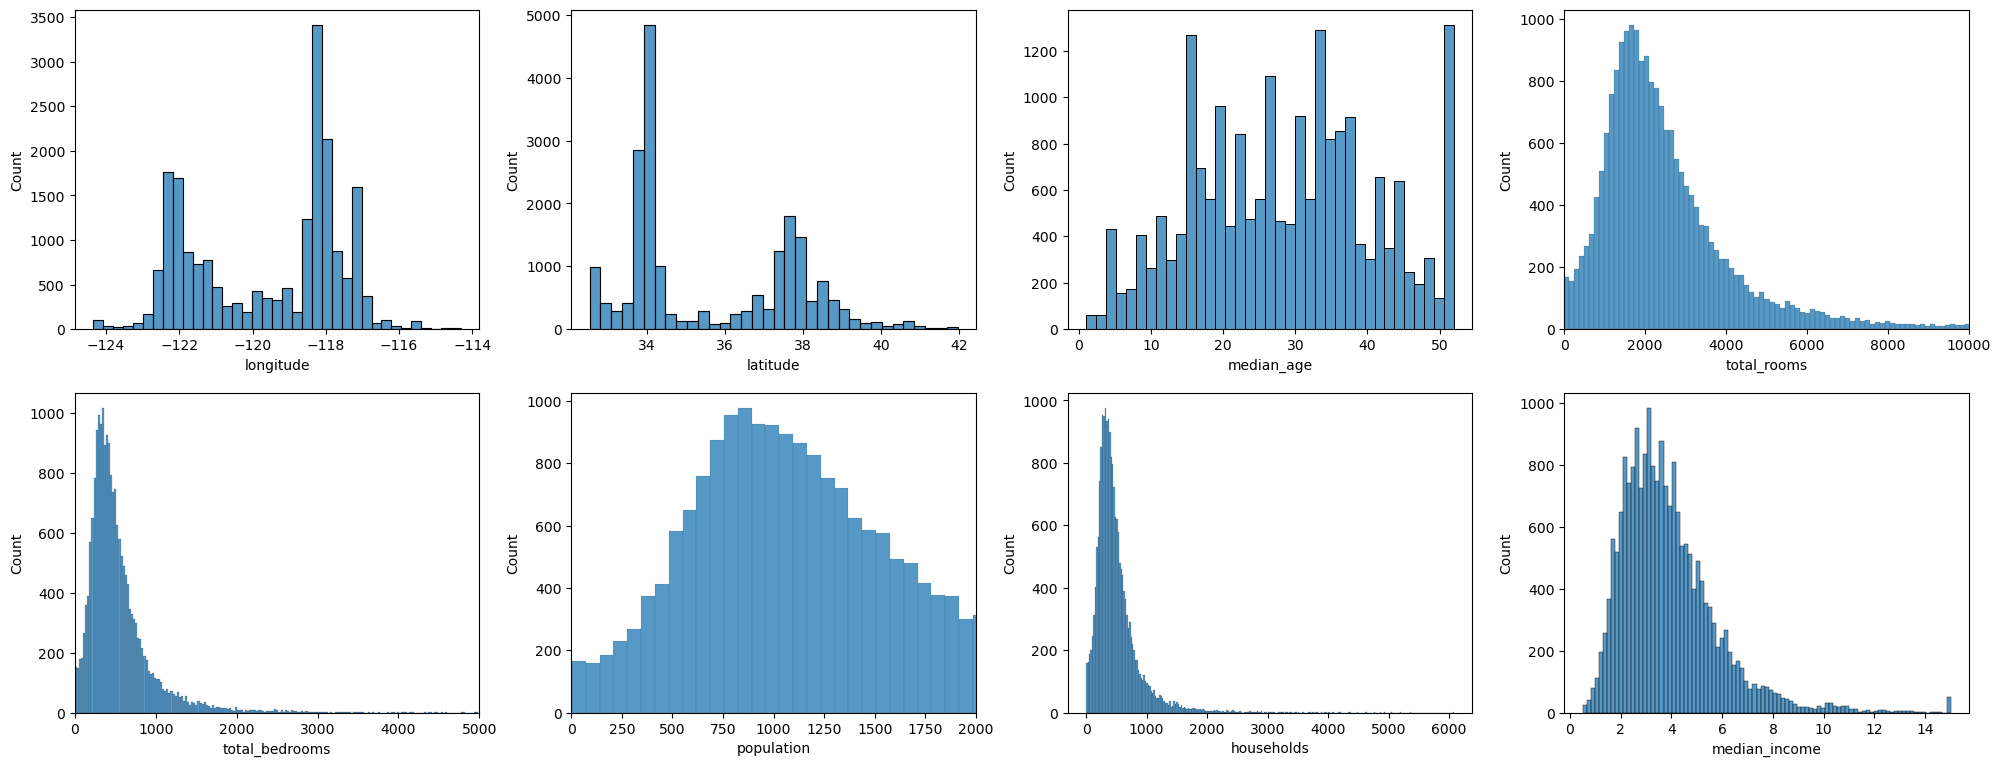

The mean longitude is 0   -118.31
Name: longitude, dtype: float64
The mean latitude is 0    34.06
Name: latitude, dtype: float64
The mean age is 28.633093525179856
The mean room is 2636.5042333480155


In [6]:
plt.rcParams['figure.figsize'] = (20, 15)

features = [col for col in df.columns]

plotArr = [None] * 9

location_columns = ["<1h_ocean", "inland", "near_bay", "near_ocean", "island"]
location_counts = df[location_columns].sum()

for i in range(1, 9):
        plotArr[i] = plt.subplot(4, 4, i)
        plt.tight_layout()
        sns.histplot(data=df, x=features[i - 1], ax=plotArr[i])
        

plotArr[4].set_xlim([0, 10000]) 
plotArr[5].set_xlim([0, 5000]) 
plotArr[6].set_xlim([0, 2000]) 
plt.show()

mean_longitude = df['longitude'].mode()
mean_latitude = df['latitude'].mode()
mean_age = df['median_age'].mean()
mean_room = df['total_rooms'].mean()

print(f"The mean longitude is {mean_longitude}")
print(f"The mean latitude is {mean_latitude}")
print(f"The mean age is {mean_age}")
print(f"The mean room is {mean_room}")


Longitude Lattitude
In the graphs for longitude and lattitude the largest spikes are under long,lat (-118.31,34.06). These coordinates present themselves as the center of Los Angeles. Consulting wikipekia for California city populations (https://en.wikipedia.org/wiki/List_of_largest_cities_in_California_by_population) Los Angeles reveals itself to be the most populated with 3.8 million residents whereas the next most populated presents itself as San Diego with a mere 1.3 million residents, about 34% of LA's population. The large residnet pool in this location is what likely contributes to the spikes in these locations.

Age
In the graph for median age data seems mostly random. The largest spikes present themselves at 34 and 51 years of age with sparatic spikes at 27 and 16.According to data from (http://www.betterinstitutions.com/blog/2021/3/25/what-housing-boom-an-updated-chart-of-housing-units-built-each-year-in-the-city-of-los-angeles), majority of Los Angeles housing was built around and before 1939 with the seccond most in the period 1950-1959. Given that dataset has an estimated age of 1950, subtracting 1950 from 1939 leads to roughly 50 -which is reflefcted in the age graph. 

Total number of rooms
The total number of rooms, displays a standard deviation around 2,000. The lack of historical evidence regarding the 2,000 rooms mark's popularity might point towards a historical trend or a specific cultural or economic influence such as neighborhood zoning laws. Often zoning laws dictate what kind of buildings can be constructed in certain areas, including the maximum number of rooms. 

Population
With a standard deviation of approximately 10,000 in the population data, there's a considerable range in the population size across the sampled neighborhoods. This broad spread in the population could also imply unequal distribution of resources, services, across the region forcing large populations of certain amounts to centrally congregate (just enough to run the needed services).

Households
The household number per neighborhood, much like the total number of rooms, does not have substantial historical data backing it up. However, The number of households could be influenced by the area's real estate market, economic health, and the demographic makeup of the area. Higher rates of single-person households could show a higher number of households overall.


Text(0, 0.5, 'Count')

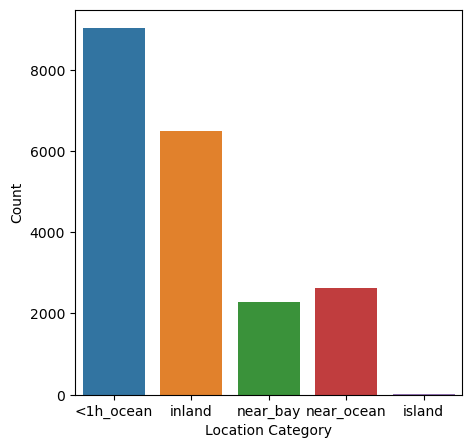

In [7]:
plt.rcParams['figure.figsize'] = (5, 5)
sns.barplot(x = location_counts.index, y = location_counts.values)
plt.xlabel('Location Category')
plt.ylabel('Count')

Location category
The location data provides insight into how geographical preferences influence housing development. Majority of houses being located less than one hour from the coast is reflective of the sampling from California, where much of the population resides within this coastal proximity. It’s well documented that humans often display a preference for coastal areas due to the natural beauty, recreational opportunities, and economic benefits they offer. Coastal areas often experience higher rates of development due to their attractiveness for both residential and commercial use. Affinity towards coastal properties, coupled with the natural geographic restrictions of California, contribute to the location category results.

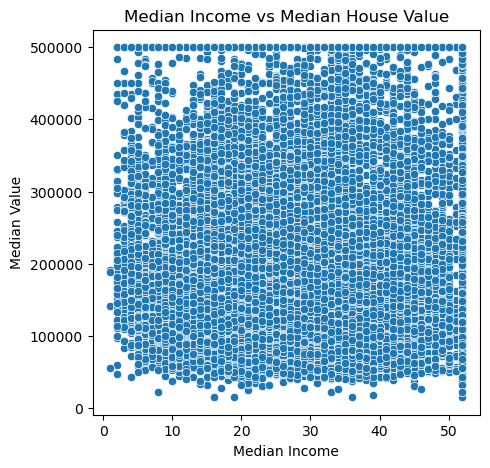

In [8]:
sns.scatterplot(x = 'median_age', y = 'median_price', data = df)
plt.rcParams['figure.figsize'] = (8, 6)
plt.title('Median Income vs Median House Value') 
plt.xlabel('Median Income')
plt.ylabel('Median Value')
plt.show() 

This graph shows no trends and has dots covering most of the plot. This would mean that there is no trend between median income and median house value. It can be inferred that house value in this context is not unilaterally dictated by median income, but rather more environmental factors.

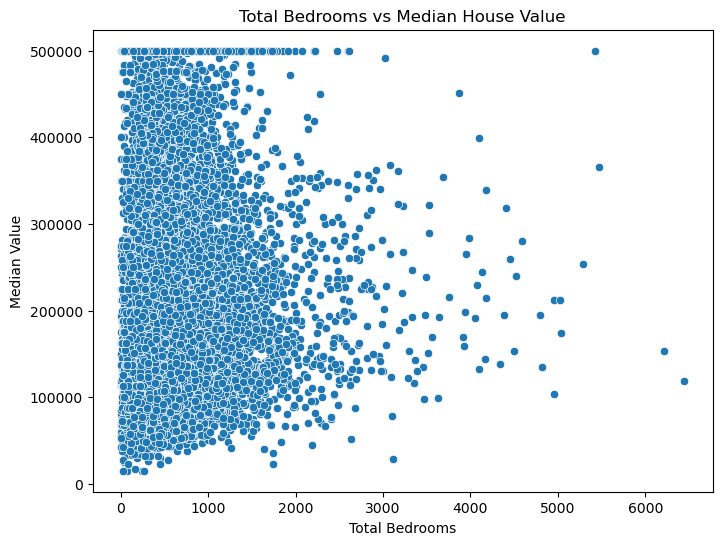

In [9]:
sns.scatterplot(x ='total_bedrooms', y = 'median_price', data = df)
plt.rcParams['figure.figsize'] = (8, 6)
plt.title('Total Bedrooms vs Median House Value') 
plt.xlabel('Total Bedrooms')
plt.ylabel('Median Value')
plt.show() 

This scatterplot shows an increased amount of bedrooms around \\$200000. The trend suggests that houses in this price range are, on average, constructed with less bedrooms than houses of lower or higher values, specifically around the \\$100,000 and \\$400,000 marks. This counter-intuitive trend might be the result of personalized housing developments rather than building the largest house possible.

# Model Selection & Implementation

In [10]:
X = df[['<1h_ocean', "inland", "near_bay", "near_ocean", "island", 'total_bedrooms', 'median_age']]
y = df['median_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

standardizer = StandardScaler()

# standardizing the values
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

In [11]:
# linear regression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

linreg_y_pred = linReg.predict(X_test)

linreg_mse = mean_squared_error(y_test, linreg_y_pred)
linreg_r2 = r2_score(y_test, linreg_y_pred)
linreg_rmse = np.sqrt(linreg_mse)

print('RMSE:', linreg_rmse)
print('MSE:', linreg_mse)
print('R^2:', linreg_r2)

RMSE: 100391.0414401433
MSE: 10078361201.43657
R^2: 0.23990475655340593


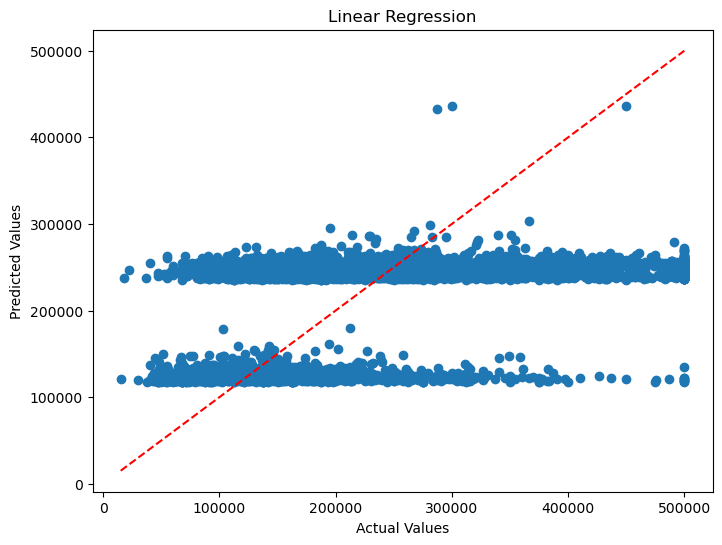

In [12]:
# plotting the linear regression 
plt.scatter(y_test, linreg_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

In [13]:
# knn
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_test_np = y_test.to_numpy()

knn_mse = mean_squared_error(y_test_np, y_pred)
print("test",y_test_np)
print("other",y_pred)

knn_r2 = r2_score(y_test_np, y_pred)

knn_rmse = np.sqrt(knn_mse)

print('RMSE:', knn_rmse)
print('MSE:', knn_mse)
print('R^2:', knn_r2)

test [245800 137900 218200 ... 225800 150000 314100]
other [246180.  135320.  339520.2 ... 186320.  357160.2 203780. ]
RMSE: 106587.35720660318
MSE: 11360864716.288021
R^2: 0.143180219512287


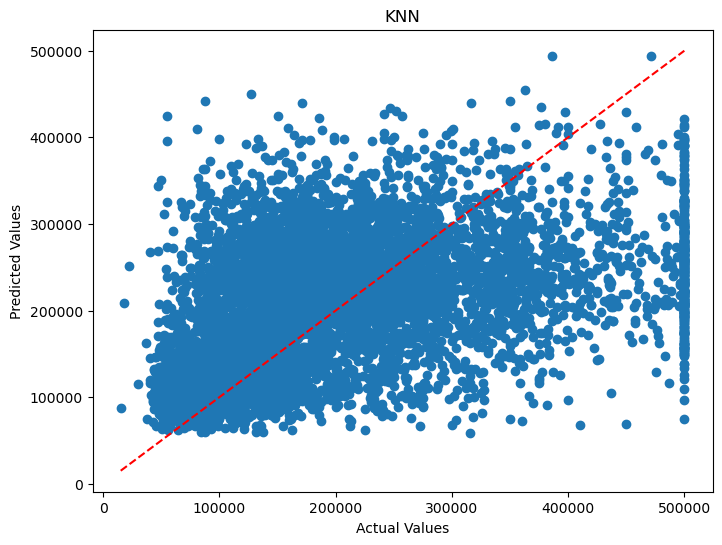

RMSE: 106587.35720660318
MSE: 11360864716.288021
R^2: 0.143180219512287


In [14]:
plt.scatter(y_test_np, y_pred)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN')
plt.show()

print('RMSE:', knn_rmse)
print('MSE:', knn_mse)
print('R^2:', knn_r2)

Mean: 77991.85041343245
Standard Deviation: 1711.6954913763486
MSE: 11541984556.863579
R^2: 0.13577071145624145


Text(0.5, 1.0, 'Bootstrap')

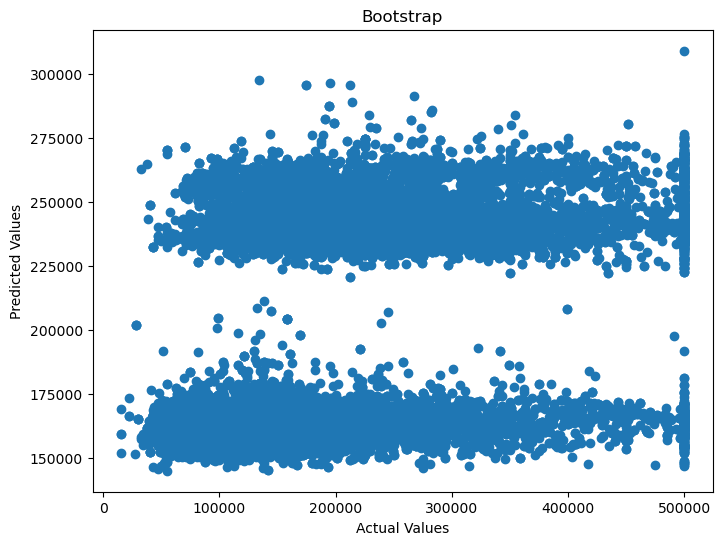

In [17]:
# bootstrap

dfnew = pd.read_csv('house.csv')

dfnew = dfnew.rename(columns={'housing_median_age': 'median_age', 'median_house_value': 'median_price'})
dfnew = dfnew.dropna(axis='index')

dfnew = pd.get_dummies(dfnew, columns=['ocean_proximity'])

boots = 100
fitParamArr = np.zeros(boots)
mse_arr = np.zeros(boots)
r2_arr = np.zeros(boots)

for i in range(boots):
    thisBoot = dfnew.sample(frac=1, replace=True)

    X = thisBoot[['ocean_proximity_NEAR BAY', 'ocean_proximity_<1H OCEAN', 'total_bedrooms', 'median_age']] # adjust columns
    y = thisBoot['median_price']
    X = sm.add_constant(X) 

    X = np.asarray(X)
    y = np.asarray(y)

    # check if 'median_price' is binary
    if np.all(np.unique(y) == [0, 1]): 
        mdl = sm.Logit(y, X).fit(disp=False)
    else: 
        mdl = sm.OLS(y, X).fit(disp=False)

    y_pred = mdl.predict(X)

    boot_mse = mean_squared_error(y, y_pred)
    mse_arr[i] = boot_mse

    boot_r2 = r2_score(y, y_pred)
    r2_arr[i] = boot_r2

    fitParamArr[i] = mdl.params[2] 

print("Mean:", np.mean(fitParamArr))
print("Standard Deviation:", np.std(fitParamArr))
print("MSE:", np.mean(mse_arr))
print("R^2:", np.mean(r2_arr))

plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Bootstrap')

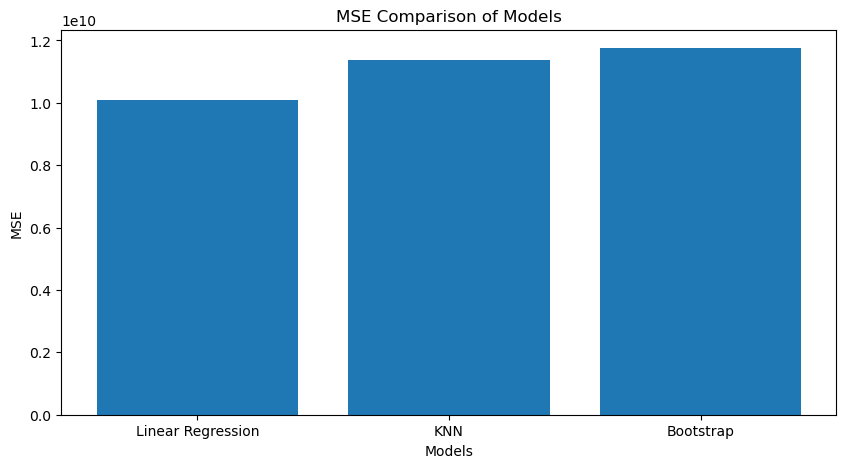

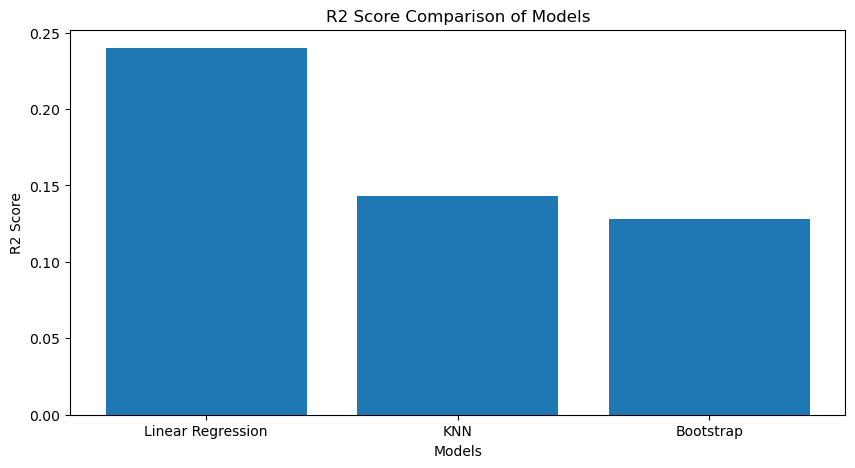

In [18]:
# compare MSE, R^2 of models against each other

models = ['Linear Regression', 'KNN', 'Bootstrap']
mses = [linreg_mse, knn_mse, boot_mse]

plt.rcParams['figure.figsize'] = (10, 5)

plt.bar(models, mses)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Models')
plt.show()

r2s = [linreg_r2, knn_r2, boot_r2]

plt.bar(models, r2s)
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison of Models')
plt.show()